# 투빅스 18기 Week2 Logistic Regression 과제3 - 18기 이다인

#### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
#### - 성능지표를 계산하고 이에 대해 해석해주세요.
#### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
#### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
plt.style.use('seaborn')

In [2]:
data = pd.read_csv("assignment3_creditcard.csv")

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


## 데이터 전처리

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28678 entries, 0 to 28677
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      28678 non-null  float64
 1   V2      28678 non-null  float64
 2   V3      28678 non-null  float64
 3   V4      28678 non-null  float64
 4   V5      28678 non-null  float64
 5   V6      28678 non-null  float64
 6   V7      28678 non-null  float64
 7   V8      28678 non-null  float64
 8   V9      28678 non-null  float64
 9   V10     28678 non-null  float64
 10  V11     28678 non-null  float64
 11  V12     28678 non-null  float64
 12  V13     28678 non-null  float64
 13  V14     28678 non-null  float64
 14  V15     28678 non-null  float64
 15  V16     28678 non-null  float64
 16  V17     28678 non-null  float64
 17  V18     28678 non-null  float64
 18  V19     28678 non-null  float64
 19  V20     28678 non-null  float64
 20  V21     28678 non-null  float64
 21  V22     28678 non-null  float64
 22

* 결측치는 존재하지 않는 것으로 보인다.

In [5]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,...,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,-0.015438,0.053653,-0.046031,0.037348,-0.033724,-0.003299,-0.051054,0.006064,-0.018530,-0.041149,...,0.002633,0.010289,-0.000656,-0.004800,-0.000897,-0.001989,-0.000765,0.000948,0.001535,0.008578
std,2.031529,1.616186,1.758169,1.482109,1.486998,1.339259,1.454827,1.364342,1.134065,1.252593,...,0.720307,0.847152,0.739469,0.593663,0.603349,0.517968,0.483852,0.397075,0.296736,0.092221
min,-30.552380,-42.172688,-31.103685,-5.560118,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,...,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-2.241620,-7.418878,-9.617915,0.000000
25%,-0.916927,-0.575381,-0.899872,-0.843321,-0.714901,-0.763757,-0.568146,-0.206103,-0.661909,-0.543450,...,-0.209678,-0.225520,-0.539244,-0.160583,-0.356047,-0.318619,-0.327343,-0.070558,-0.052189,0.000000
50%,0.020050,0.075358,0.180610,-0.008844,-0.060040,-0.271363,0.036107,0.022463,-0.055095,-0.097390,...,-0.062792,-0.028778,0.007302,-0.011199,0.040006,0.019770,-0.056260,0.002049,0.011075,0.000000
75%,1.317461,0.806957,1.029928,0.771958,0.613328,0.397269,0.559409,0.329606,0.605704,0.460681,...,0.131199,0.184312,0.526358,0.146835,0.437146,0.352717,0.240713,0.091637,0.078911,0.000000
max,2.399484,21.467203,4.069865,11.927512,32.911462,22.529298,36.677268,20.007208,8.113152,15.236028,...,26.237391,27.202839,8.361985,9.637187,3.948061,2.510401,3.122747,11.135740,14.929133,1.000000


* 변수들간의 스케일 차이가 존재하며 분포가 일정하지 않은 것을 확인할 수 있다. 따라서 scaling이 필요하다고 판단했고, 표준화를 진행하기로 하였다.

In [6]:
# scaling 진행 전 target 변수 분리
target = data.iloc[:, -1]
features = data.iloc[:, :-1]

### feature scaling

In [7]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit_transform(features)
features = pd.DataFrame(ss.fit_transform(features), columns = features.columns)
features.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-0.902180,1.442462,0.242076,0.682170,-0.545636,1.897453,-3.087657,-7.481774,-1.310739,-1.750813,...,0.184394,3.586292,-6.258702,1.163043,0.721013,-0.838813,1.973207,-1.295843,-0.047097,0.941755
1,1.027442,-0.328926,-0.795394,-0.395393,0.029429,-0.432294,0.005620,-0.185605,1.049741,-0.240491,...,0.770828,-0.110982,0.038445,0.528470,0.078108,0.993348,0.194594,2.026379,-0.237219,-0.226298
2,-1.461907,-1.733201,0.705348,-0.027248,-0.751404,-0.194335,0.415558,0.461429,0.403048,-1.409372,...,-1.078858,1.864714,0.429058,-0.520817,2.025422,0.676446,0.019311,1.577217,-0.755467,-1.029430
3,-0.720659,0.921458,0.191638,0.540317,-0.333272,-0.533410,0.368140,0.395090,-0.672139,0.292162,...,0.793099,0.049651,0.125696,0.549344,-0.188079,0.898622,-0.414465,-0.857327,0.065929,-0.511850
4,-0.131203,-0.224824,-1.203698,-0.599739,0.094078,-1.105548,1.362418,-0.622372,-1.085267,0.894765,...,-0.651400,-1.219154,-0.017103,1.373663,-0.036971,0.129301,-2.831946,1.555181,1.248615,1.110322


### Target distribution 

In [8]:
target.value_counts()

0    28432
1      246
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

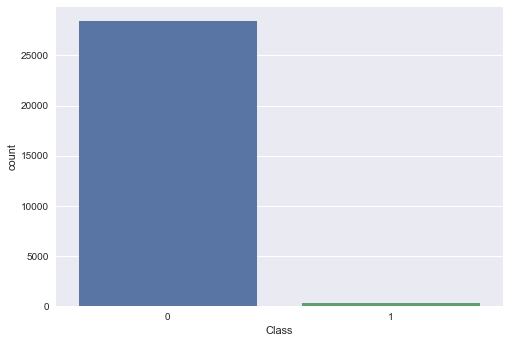

In [9]:
sns.countplot(target)

* target의 분포를 보았을 때 심한 불균형이 나타난다는 것을 알 수 있다. 사기 거래인 비율이 극도로 작기 때문이다.

## train / test  셋 분리

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = 42)

## Logistic Regression 모델 적용

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

pred = model.predict(X_test)

## 모델 성능 평가

### 평가 지표 설명

* Accuracy(정확도) = $\frac{TP+TN}{TP+FN+FP+TN}$   
: 전체 데이터 수 중 예측 결과와 실제 값이 동일한 비율
* Precision(정밀도) =$\frac{TP}{TP+FP}$  
: 분류 모델이 사기 거래를 진단하기 위해 얼마나 잘 작동했는지 보여주는 지표
* Recall(재현율) =$\frac{TP}{TP+FN}$  
: 사기 거래 데이터 중 실제로 사기거래라고 판단한 비율
* Specificity(특이도) = $\frac{TN}{FP+TN}$  
: 분류 모델이 정상을 진단하기 위해 얼마나 잘 작동했는지 보여주는 지표

* f1_score (Recall과 Precision의 조화평균) = $2*\frac{Precision*Recall}{Precision+Recall}$  
: 재현율과 정밀도의 균형을 나타내는 수치

### 1. sklearn패키지를 이용한 모델 성능 평가

In [12]:
from sklearn.metrics import *

print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5695
           1       0.85      1.00      0.92        41

    accuracy                           1.00      5736
   macro avg       0.93      1.00      0.96      5736
weighted avg       1.00      1.00      1.00      5736



* 위 classification_report 결과를 보면 Precision의 경우 예측한 데이터의 100%가 실제로 정상이었고, 예측한 데이터의 85%만이 실제로 사기거래 인 것을 알 수 있다. 또한 recall의 값과 Accuracy의 값이 모두 1인 것을 통해 모델의 성능이 꽤 좋다는 것을 판단할 수 있으며, f1-score 값 또한 0.96으로 모델의 학습이 잘 되었다는 것을 알 수 있다.

### 2. confusion matrix를 이용한 모델 성능 평가

In [13]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
confusion_matrix(y_test, pred)

array([[5688,    0],
       [   7,   41]], dtype=int64)

In [14]:
accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = (tp)/(tp+fp)
recall = (tp)/(tp+fn)
f1_score = 2*(precision*recall)/(precision+recall)
print("accuracy:",accuracy)
print("precision: ", precision)
print("recall: ", recall)
print("f1_score: ", f1_score)

accuracy: 0.9987796373779637
precision:  1.0
recall:  0.8541666666666666
f1_score:  0.9213483146067416


* 전체적으로 accuracy와 f1_score는 sklearn패키지의 classification_report 를 이용했을 때와 비교했을 때 조금 떨어진 것을 알 수 있지만, 그럼에도 수치상으로는 모델의 성능이 좋다고 판단할 수 있다.
* 또한 precision, recall의 값은 sklearn패키지의 classification_report 와 둘이 정반대의 결과가 나온 것을 알 수 있다. 

### 3. ROC curve 와 AUC, Cut-Off값을 통한 모델 성능 평가

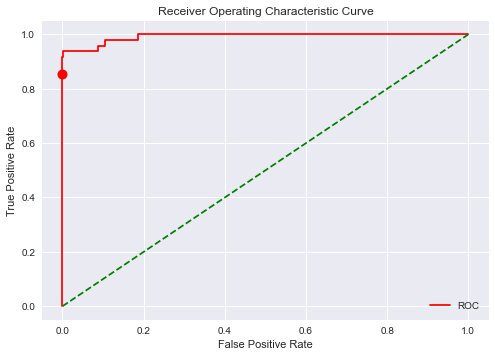

In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test,model.decision_function(X_test))
specificity = (tn)/(fp+tn)

# ROC curve 그리기
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.plot([1-specificity], [recall], 'ro', ms=10)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [16]:
print("auc : ", auc(fpr, tpr))

auc :  0.9921032583216127


* ROC curve의 x축은(1 - specificity = FPR)은 사기 거래 중 잘못 예측한 비율이고, y축은 (recall) 예측한 정상의 값중 실제로도 정상인 비율이 된다
* ROC curve의 경우 곡선이 좌측으로 굽어질수록 정확한 모델을 의미하는데, 위의 그래프에서 보이듯 그래프가 많이 굽어있으므로 모델 예측이 잘 되었다고 판단할 수 있다.
* auc의 경우 1에 가까울 수록 모델의 성능이 높다고 평가하며, 여기서도 auc의 값이 0.9921로 1과 가까운 것을 알 수 있다.
* cutoff값의 경우 fpr의 값이 낮고 tpr의 값이 높은 지점에 위치하는 것이 좋은데 위 그래프 상에서 거의 왼쪽 상단부에 위치해있음을 알 수 있다. 하지만 모델이 심한 불균형 데이터로 정상을 잡아내는 것보다 사기거래를 잡아내는 것이 중요하므로 cutoff값이 더 좌측 상단으로 가는 것이 좋다. 따라서 cutoff 값을 기준으로 새롭게 모델 예측을 시도해보려고 한다.

## 새로운 cut-off 값을 통한 모델 예측

* 최적의 cutoff 값은 접선의 기울기가 1인 지점에 설정하는 것이 좋으므로, 기울기가 1인 y = x + k 인 접선을 바탕으로 ROC curve와 접하는 지점을 찾으면 된다. 즉, (sensitivity)-(1-specificity) = k 일 때, 가장 큰 값의 k를 찾으면 된다. 그 k값을 바탕으로 새로운 cutoff 값을 찾고 이를 기준으로 사기거래를 분류해보고자 한다. 

In [17]:
#최적의 cutoff값을 찾은 후 이를 기준으로 사기 거래 분류하기
optimal_k = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_k]
predict = model.decision_function(X_test) > optimal_threshold

In [18]:
#사이킷 런 패키지를 통한 모델 성능 평가
print(classification_report(predict,y_test))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      5681
        True       0.92      0.80      0.85        55

    accuracy                           1.00      5736
   macro avg       0.96      0.90      0.93      5736
weighted avg       1.00      1.00      1.00      5736



In [19]:
#confusion matrix를 이용한 모델 성능 평가
tn, fp, fn, tp = confusion_matrix(y_test, predict).ravel()
confusion_matrix(y_test, predict)

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = (tp)/(tp+fp)
recall = (tp)/(tp+fn)
f1_score = 2*(precision*recall)/(precision+recall)
print("new_accuracy:",accuracy)
print("new_precision: ", precision)
print("new_recall: ", recall)
print("new_f1_score: ", f1_score)

new_accuracy: 0.9973849372384938
new_precision:  0.8
new_recall:  0.9166666666666666
new_f1_score:  0.854368932038835


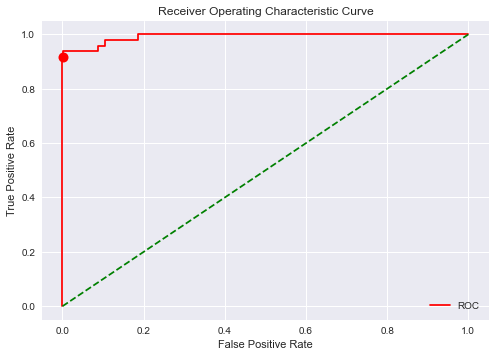

In [20]:
fpr, tpr, thresholds = roc_curve(y_test,model.decision_function(X_test))
specificity = (tn)/(fp+tn)


# ROC curve 그리기
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.plot([1-(tn / (fp+tn))], [tp / (fn+tp)], 'ro', ms=10)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

* 새로운 cut-off값을 구한 후 모델 예측을 시도해본 결과 위의 그래프에서 보이다시피 cut-off값은 이전보다 조금 더 좌측 상단으로 올란 간 것을 확인할 수 있다. 
*  precision와 f1_score의 경우 이전보다 크게 감소한 것을 확인할 수 있지만, 그와 반대로 recall값은 이전보다 상승하였다. 
* 이번 모델의 성능을 평가하는 데 recall이 중요한 지표임은 맞지만, recall값만 올라갔기에 모델의 성능이 좋아졌다고 판단하는 것은 어렵다.
* 재현율(recall)이 중요한 지표의 경우는 암 판단 모델이나 사기 적발 모델과 같이 실제 정상인 데이터를 사기로 잘못 판단하게 되면 큰 영향을 받는 경우이다. 따라서 이번 과제에서 진행한 금융 사기 적발 모델 예측의 경우 재현율이 중요한 지표로 작용한다는 것은 사실이다. 
* 하지만 재현율과 정밀도의 특성상 두 지표는 서로 보완적인 지표가 될 수 있으며, 좋은 모델이 되기 위해서는 두 지표 모두 높은 수치를 얻는 것이 좋다.
* 따라서 더 좋은 모델이 되기 위해서는 recall값과 precision 값 모두를 올릴 방안을 찾아야 한다.